In [1]:
# Import our dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
# Import the speech recognition data
df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m18/lesson_1/datasets/voice.csv")
df.head()

,V1,V2,V3,V4,V5,Class
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418,1
1,-0.641265,0.109245,0.292130,-0.916804,0.240223,1
2,0.870593,-0.459862,0.578159,0.806634,0.835248,1
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583,1
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127,1


In [3]:
# Check the classes in the dataset
df["Class"].unique()

array([1, 2])

In [4]:
# Fix the classes to create binary output, necessary for our neural network model
df.loc[df["Class"]==2,"Class"] = 0

df["Class"].unique()

array([1, 0])

In [5]:
# Drop the label to create the X data
X = df.drop('Class', axis=1)
# Create the y set from the "Class" column
y = df["Class"]

In [6]:
# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [8]:
# Set input nodes to the number of features
input_nodes = len(X.columns)

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=input_nodes))

/Users/stevenhill/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [10]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36 (144.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.6092 - loss: 0.6896 
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.7377 - loss: 0.6123
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.7499 - loss: 0.5575
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.7506 - loss: 0.5301
Epoch 5/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.7464 - loss: 0.5009
Epoch 6/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.7552 - loss: 0.4847
Epoch 7/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.7526 - loss: 0.4782
Epoch 8/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.7695 - loss: 0.4658
Epoch 9/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.7748 - loss: 0.4575
Epoch 10/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.7730 - loss: 0.4483
Epoch 11/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.7654 - loss: 0.4432
Epoch 12/100
127/1

<Axes: >

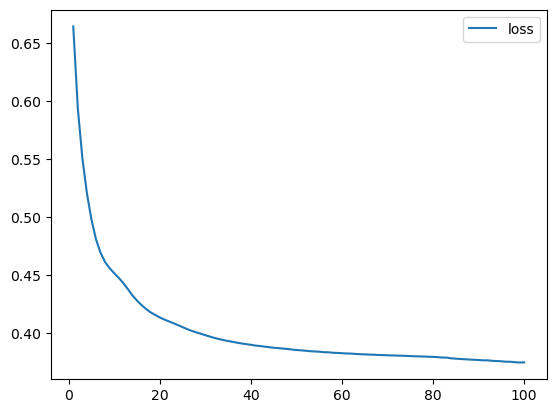

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<Axes: >

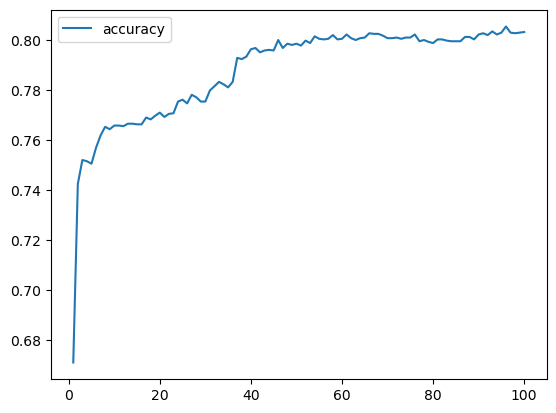

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

43/43 - 0s - 2ms/step - accuracy: 0.8009 - loss: 0.3794
Loss: 0.37937554717063904, Accuracy: 0.8008882403373718


In [15]:
# Make predictions
predictions = nn_model.predict(X_test,verbose=2)
predictions

43/43 - 0s - 740us/step


array([[0.9787953 ],
       [0.76285535],
       [0.98919153],
       ...,
       [0.42877722],
       [0.5746427 ],
       [0.62592304]], dtype=float32)

In [16]:
# Round predictions
predictions_rounded = [round(prediction[0],0) for prediction in predictions]
predictions_rounded

[1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0

In [17]:
# Check the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_rounded))


              precision    recall  f1-score   support

           0       0.64      0.72      0.68       392
           1       0.88      0.84      0.86       959

    accuracy                           0.80      1351
   macro avg       0.76      0.78      0.77      1351
weighted avg       0.81      0.80      0.80      1351



In [18]:
# Compare with random forest model
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {rf_model.score(X_train, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9059955588452998


In [19]:
# Make predictions and produce the classification report for the random forest model
predictions = rf_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       392
           1       0.94      0.92      0.93       959

    accuracy                           0.91      1351
   macro avg       0.88      0.89      0.89      1351
weighted avg       0.91      0.91      0.91      1351

